In [46]:
import pandas as pd
## downloaded from https://www.kaggle.com/datasets/blastchar/telco-customer-churn
data_path= 'datas/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [47]:
df=pd.read_csv(data_path)


In [3]:
import numpy as np
def parse_transaction_history(transaction_history:str):
    try:
        transaction_history=transaction_history\
            .replace("'date': datetime.date(2025, 3, 30),","").replace("'date': datetime.date(2025, 3, 31),","")\
            .replace("{ 'amount'","")\
            .replace("}","")\
            .replace(":","")\
            .replace("[","")\
            .replace("]","")\
            .replace("'","")\
            .replace("]", "").replace("'", "").replace(" ", "")
        transaction_history=transaction_history.split(",")
        transaction_history=[float(i) for i in transaction_history]
        return np.array(transaction_history)
    except Exception as e:
        print(transaction_history)
        print(e)
        return []
df['transaction_history']=df['transaction_history'].apply(parse_transaction_history)



In [ ]:
def calculate_mean_transaction_amount(transaction_history:list):
    return sum(transaction_history)/len(transaction_history)
def calculate_total_transaction_amount(transaction_history:list):
    return sum(transaction_history)
def calculate_max_transaction_amount(transaction_history:list):
    return max(transaction_history)
def calculate_min_transaction_amount(transaction_history:list):
    return min(transaction_history)
def calculate_median_transaction_amount(transaction_history:list):
    return np.median(transaction_history)
def calculate_standard_deviation_transaction_amount(transaction_history:list):
    return np.std(transaction_history)
def calculate_number_of_transactions(transaction_history:list):
    return len(transaction_history)






df['mean_transaction_amount']=df['transaction_history'].apply(calculate_mean_transaction_amount)
df['total_transaction_amount']=df['transaction_history'].apply(calculate_total_transaction_amount)
df['max_transaction_amount']=df['transaction_history'].apply(calculate_max_transaction_amount)
df['min_transaction_amount']=df['transaction_history'].apply(calculate_min_transaction_amount)
df['median_transaction_amount']=df['transaction_history'].apply(calculate_median_transaction_amount)
df['standard_deviation_transaction_amount']=df['transaction_history'].apply(calculate_standard_deviation_transaction_amount)

df.head()



,customer_id,name,age,gender,location,balance,type_of_account,tenure,transaction_history,number_of_bank_products,...,has_credit,active_member,estimated_salary,churn,mean_transaction_amount,total_transaction_amount,max_transaction_amount,min_transaction_amount,median_transaction_amount,standard_deviation_transaction_amount
0,CUST282230,Rohan Joshi,38,Male,Assam,5865981.14,Fixed Deposit,3,"[47527.87, 18969.23, -49375.38, 54468.07, -244...",1,...,0,0,784520.06,1,17718.144839,549262.49,97908.23,-49375.38,12530.90,43051.690451
1,CUST945593,Gayathri Zacharia,83,Female,Punjab,7181305.29,Fixed Deposit,30,"[-9181.46, 4761.86, 80233.73, -19620.24, 67642...",3,...,1,1,282605.59,0,21929.543750,175436.35,80233.73,-30414.83,13188.36,39840.415354
2,CUST481383,Ijaya Varughese,90,Male,Andhra Pradesh,4814424.86,Savings,1,"[9297.97, 90730.95, 20091.49, 65088.09, 30760....",3,...,1,1,425437.71,0,27963.859762,1174482.11,94381.84,-23604.59,22963.90,32589.048545
3,CUST473061,Liam Kala,57,Female,Gujarat,8326118.75,Fixed Deposit,23,"[41711.68, 98899.94, 6349.82, -16012.23, -4371...",3,...,0,0,677331.21,0,21246.205263,403677.90,98899.94,-45739.58,28560.87,44179.554759
4,CUST130538,Ikshita Rattan,26,Female,Uttarakhand,2929743.88,Current,13,"[57101.89, 56410.09, -31121.04, 45377.89, -528...",5,...,1,1,1119682.72,0,10795.738889,194323.30,94201.46,-49222.85,-8784.18,47624.335309


In [48]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
df=df.drop(columns=['transaction_history'])
df.to_csv('bank_data_with_features.csv',index=False)

In [54]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
df.index=df["customerID"]
df.drop(columns=["customerID"],inplace=True)

In [55]:
categorical_columns=[col for col in df.columns if df[col].dtype=='object']
categorical_columns

[]

In [56]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object

In [57]:
label_encoders={}

for col in categorical_columns:
    if df[col].nunique()<2:
        continue
    else:
        le=LabelEncoder()
        df[col]=le.fit_transform(df[col])
        label_encoders[col]=le
df.head()




,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [58]:
label_encoders

{}

In [59]:
floating_columns=df.columns[df.dtypes=='float64']
scalers={}
for col in floating_columns:
    standard_scaler=MinMaxScaler()
    df[col]=standard_scaler.fit_transform(df[[col]].values.reshape(-1,1))
    scalers[col]=standard_scaler


df.head()




,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,2505,0
3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,1466,0
2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,157,1
5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,1400,0
6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,925,1


In [60]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,2505,0
3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,1466,0
2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,157,1
5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,1400,0
6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4853,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,0.662189,1597,0
1525,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,0.845274,5698,0
3367,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,0.112935,2994,0


In [61]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook"
from pandas.plotting import scatter_matrix

spearman_correlation_matrix=df.corr(method='spearman')
kendall_correlation_matrix=df.corr(method='kendall')
pearson_correlation_matrix=df.corr(method='pearson')






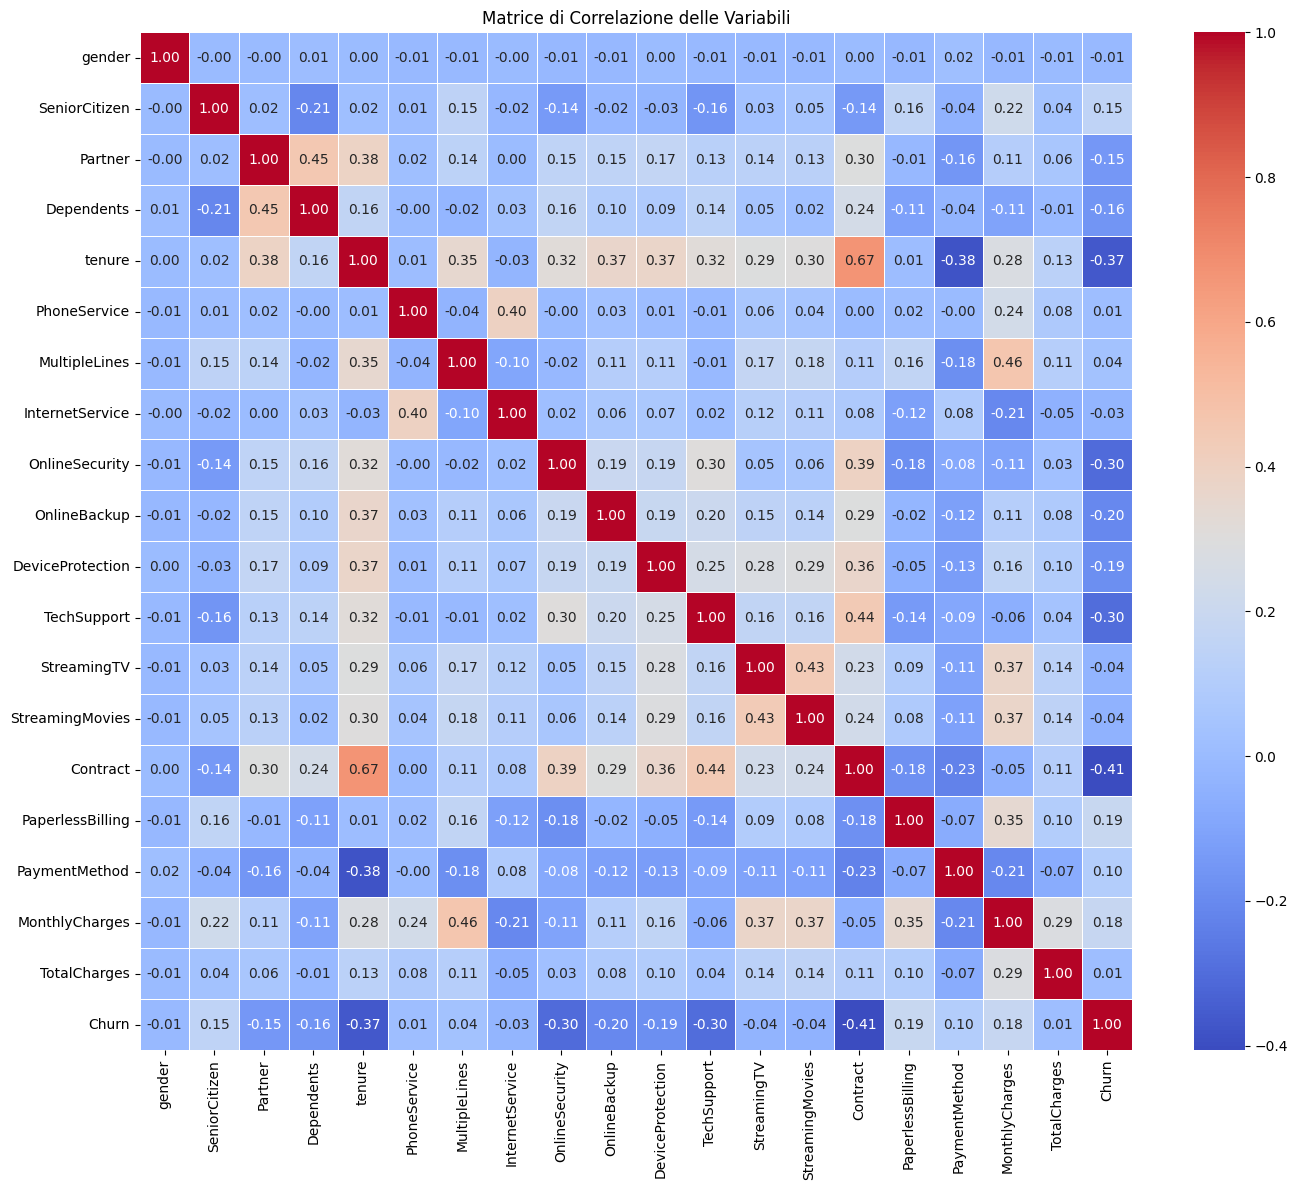

In [62]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 12))
sns.heatmap(spearman_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice di Correlazione delle Variabili')
plt.tight_layout()
plt.show()

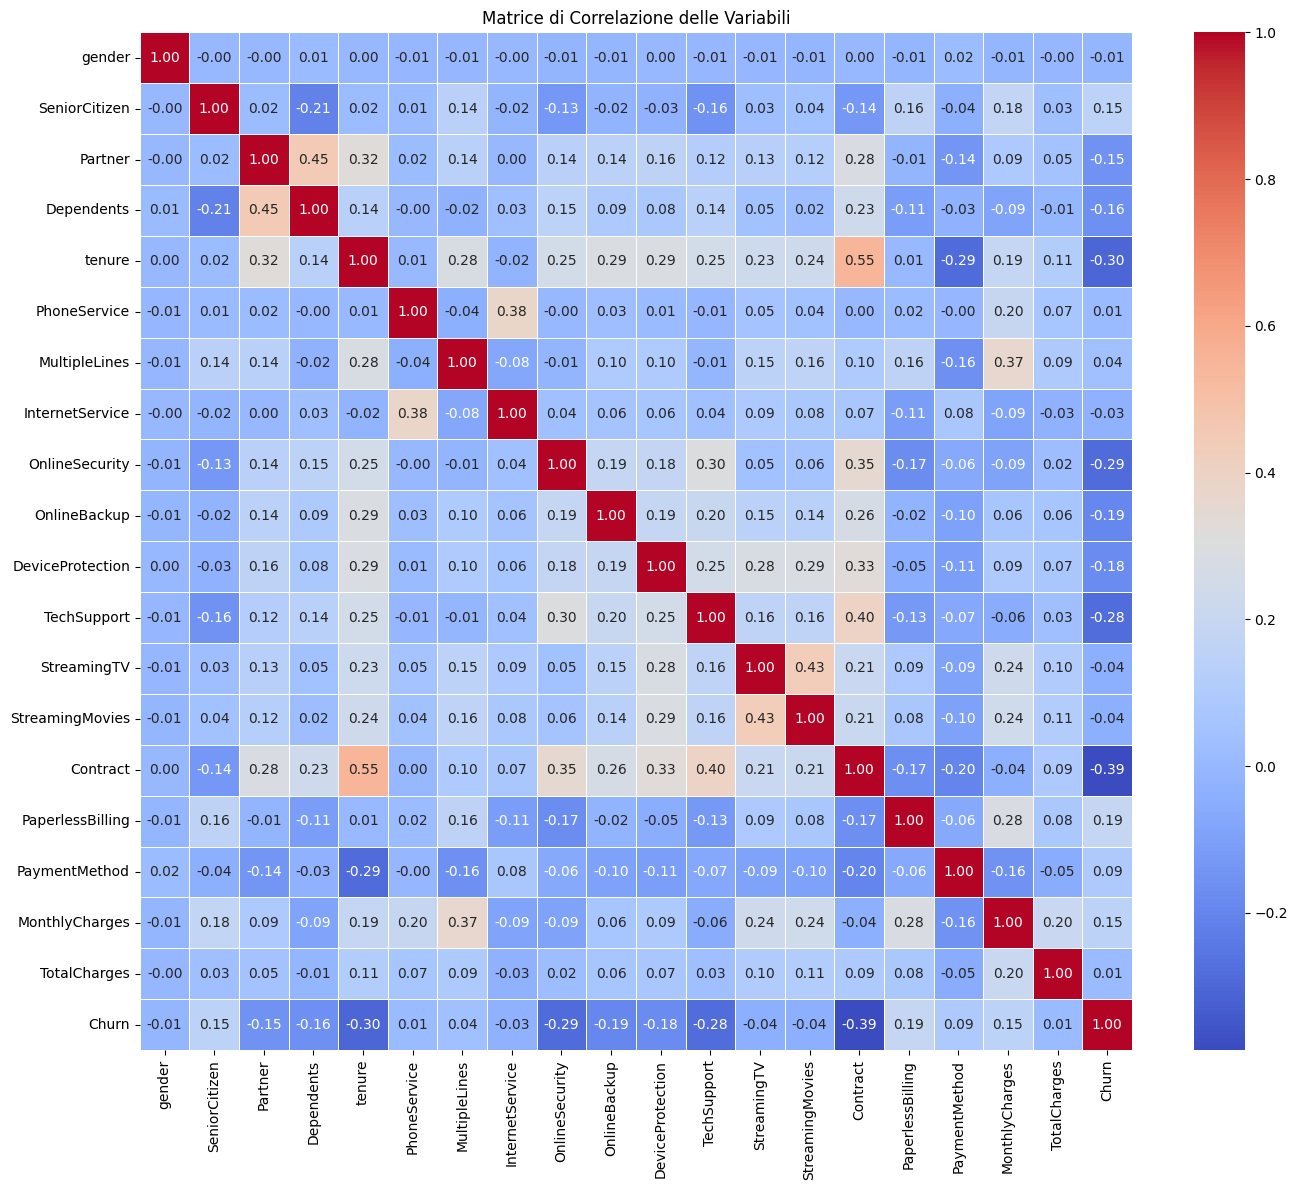

<Axes: >

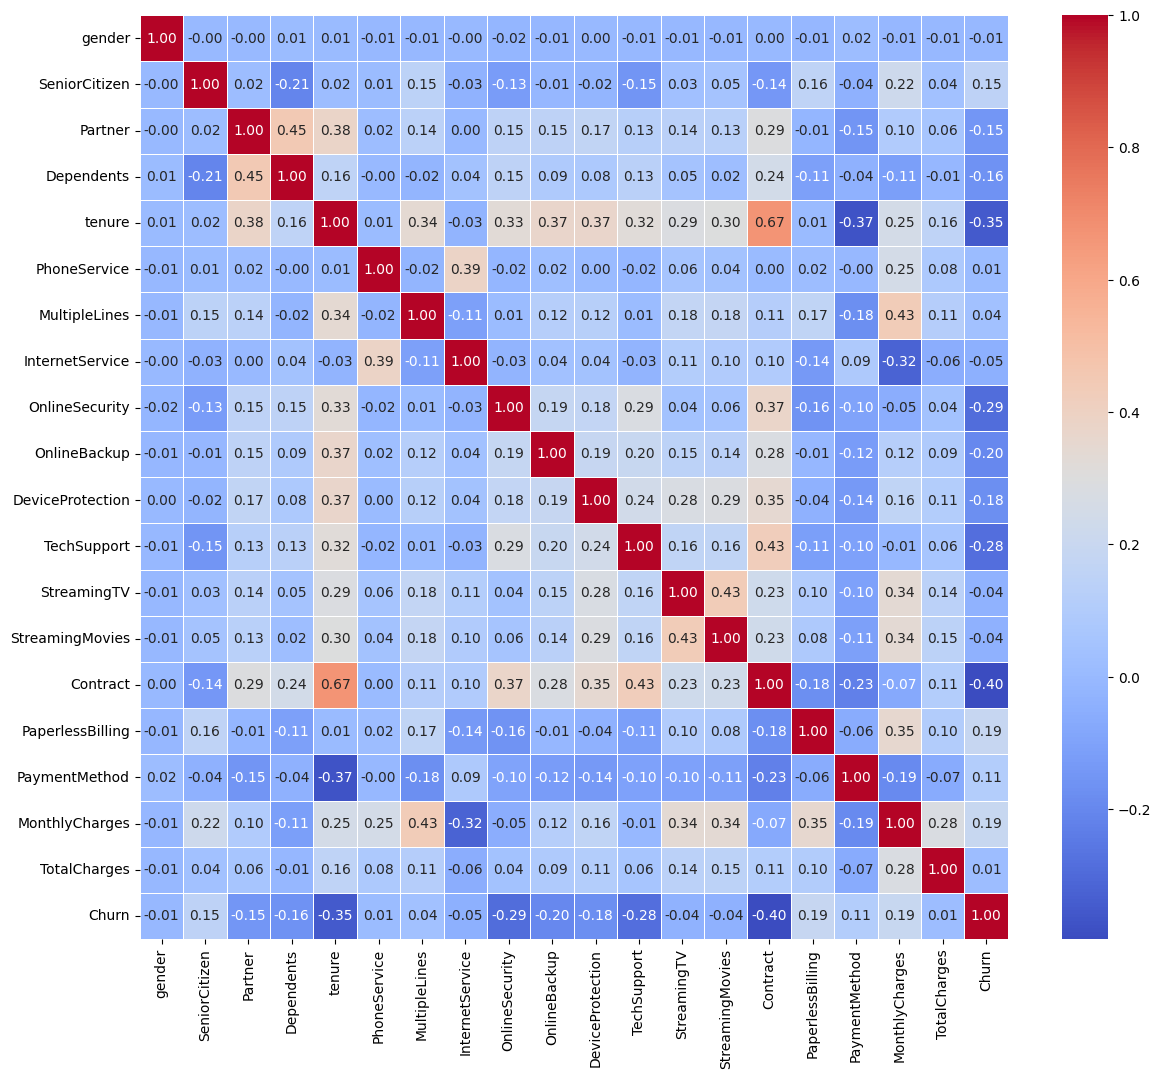

In [63]:
plt.figure(figsize=(14, 12))
sns.heatmap(kendall_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice di Correlazione delle Variabili')
plt.tight_layout()
plt.show()
plt.figure(figsize=(14, 12))
sns.heatmap(pearson_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [81]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X=df.drop(columns=['Churn'])
y=df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

list_of_columns=df.columns.drop('Churn')
shuffled_list_of_columns=np.random.permutation(list_of_columns)

X_train=X_train[shuffled_list_of_columns]
X_test=X_test[shuffled_list_of_columns]

# Initialize the XGBClassifier
xgb_model = XGBClassifier(n_estimators=100)

# Train the model
xgb_model.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

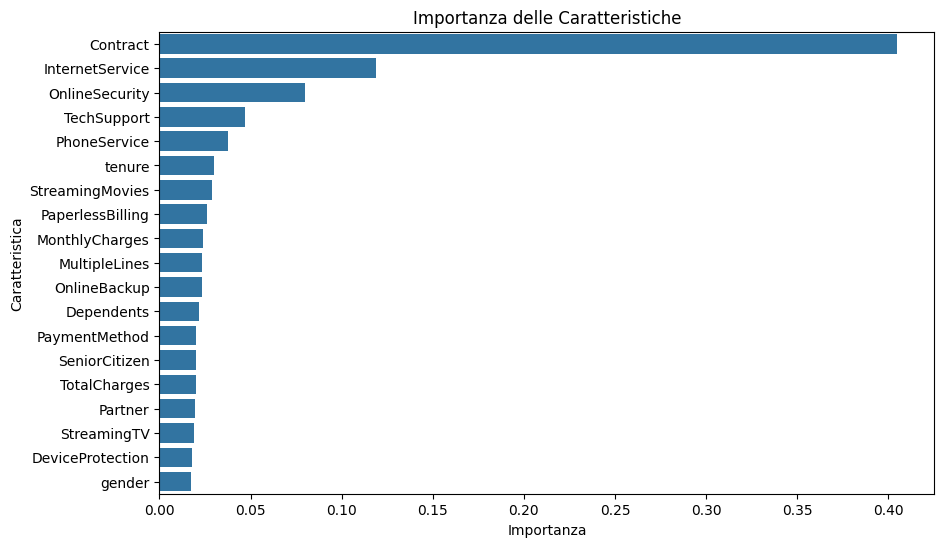

In [82]:
feature_importances=pd.DataFrame({'feature':X_train.columns,'importance':xgb_model.feature_importances_})
feature_importances=feature_importances.sort_values(by='importance',ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='importance',y='feature',data=feature_importances)
plt.title('Importanza delle Caratteristiche')
plt.xlabel('Importanza')
plt.ylabel('Caratteristica')
plt.show()

In [83]:
import optuna
from sklearn.metrics import balanced_accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.model_selection import cross_val_score


def objective(trial,metric:str):
    params={
        'n_estimators':trial.suggest_int('n_estimators',100,1000),
        'max_depth':trial.suggest_int('max_depth',3,10),
        'learning_rate':trial.suggest_float('learning_rate',0.01,0.3,log=True),
        'min_child_weight':trial.suggest_int('min_child_weight',1,10),
        'gamma':trial.suggest_float('gamma',0.01,0.3,log=True)
    }
    model=XGBClassifier(**params)
    if metric=='precision':
        return cross_val_score(model,X,y,cv=5,scoring='precision').mean()
    elif metric=='recall':
        return cross_val_score(model,X,y,cv=5,scoring='recall').mean()
    elif metric=='f1':
        return cross_val_score(model,X,y,cv=5,scoring='f1').mean()
    elif metric=='roc_auc':
        return cross_val_score(model,X,y,cv=5,scoring='roc_auc').mean()
    elif metric=='balanced_accuracy':
        return cross_val_score(model,X,y,cv=5,scoring='balanced_accuracy').mean()
    else:
        raise ValueError(f"Metric {metric} not supported")


metrics=['precision','recall','f1','roc_auc','balanced_accuracy']
studies={}
best_params={}
best_values={}
for metric in metrics:
    study=optuna.create_study(direction='maximize')
    study.optimize(lambda trial: objective(trial,metric),n_trials=100)
    studies[metric]=study
    best_params[metric]=study.best_params
    best_values[metric]=study.best_value

[I 2025-04-03 15:10:53,899] A new study created in memory with name: no-name-33315fd2-3866-439e-895d-13be56739bc3
[I 2025-04-03 15:10:55,842] Trial 0 finished with value: 0.6188130966530078 and parameters: {'n_estimators': 373, 'max_depth': 3, 'learning_rate': 0.28758396853380125, 'min_child_weight': 3, 'gamma': 0.01470327069299918}. Best is trial 0 with value: 0.6188130966530078.
[I 2025-04-03 15:10:57,213] Trial 1 finished with value: 0.6599295204192336 and parameters: {'n_estimators': 268, 'max_depth': 3, 'learning_rate': 0.07837147505053177, 'min_child_weight': 9, 'gamma': 0.02188450543746729}. Best is trial 1 with value: 0.6599295204192336.
[I 2025-04-03 15:11:00,345] Trial 2 finished with value: 0.6278016406711603 and parameters: {'n_estimators': 342, 'max_depth': 9, 'learning_rate': 0.04041012185777401, 'min_child_weight': 1, 'gamma': 0.14863185770213655}. Best is trial 1 with value: 0.6599295204192336.
[I 2025-04-03 15:11:01,738] Trial 3 finished with value: 0.6383801673518068 

In [84]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression


estimators=[]
for metric in metrics:
    estimators.append(('xgb_'+metric,XGBClassifier(**best_params[metric])))

stacking_model=StackingClassifier(estimators=estimators,final_estimator=LogisticRegression())
stacking_model.fit(X_train,y_train)
y_pred=stacking_model.predict(X_test)





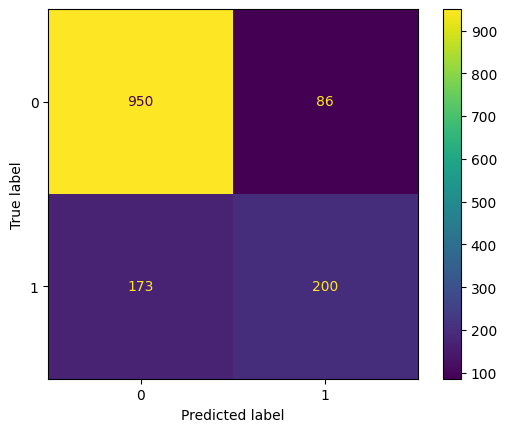

In [85]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay



confusion_matrix=ConfusionMatrixDisplay.from_predictions(y_test,y_pred)



xgb_precision
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1036
           1       0.81      0.31      0.45       373

    accuracy                           0.80      1409
   macro avg       0.80      0.64      0.66      1409
weighted avg       0.80      0.80      0.76      1409

--------------------------------
xgb_recall
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409

--------------------------------
xgb_f1
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0

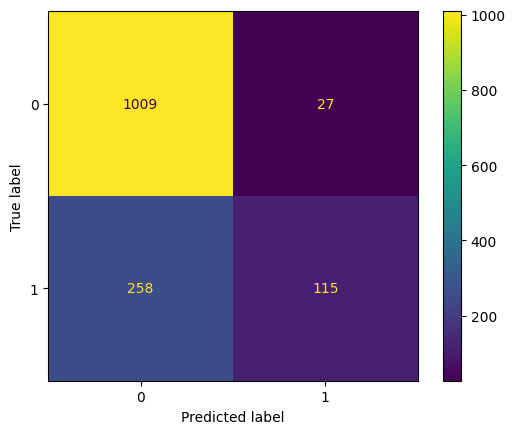

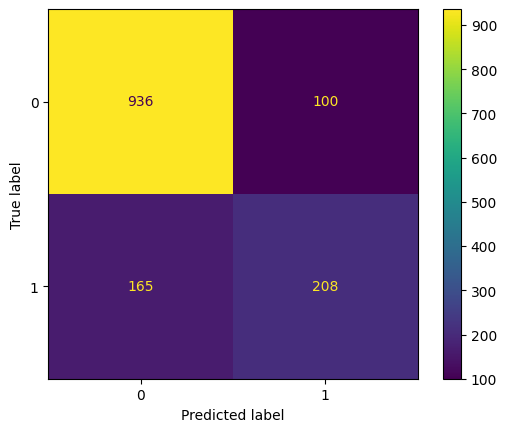

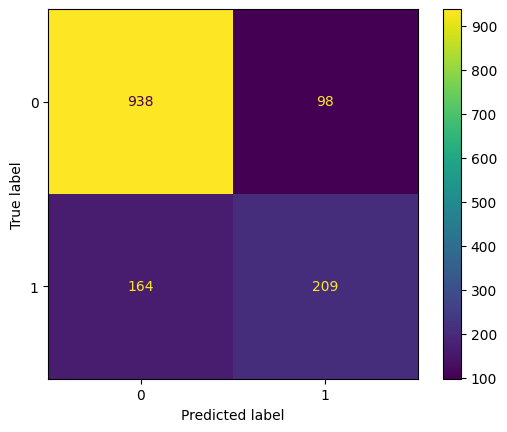

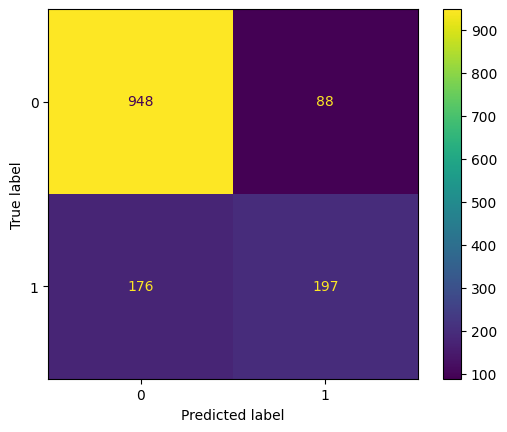

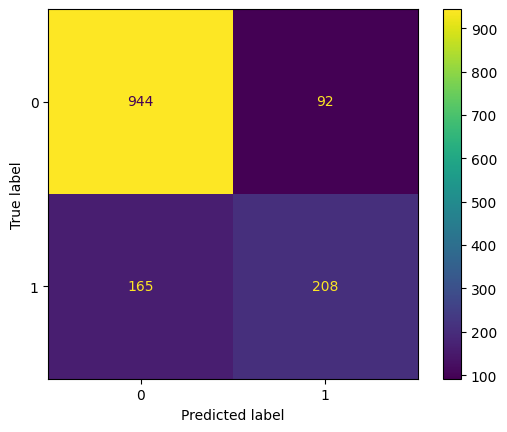

In [86]:
for name,estimator in estimators:
    estimator.fit(X_train,y_train)
    y_pred=estimator.predict(X_test)
    print(name)
    print(classification_report(y_test,y_pred))
    print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
    print('--------------------------------')
    

In [87]:
import json

with open('best_params_xbg.json', 'w') as f:
    json.dump(best_params, f)

with open('best_values_xbg.json', 'w') as f:
    json.dump(best_values, f)



In [88]:
best_params

{'precision': {'n_estimators': 103,
  'max_depth': 5,
  'learning_rate': 0.01006208036629031,
  'min_child_weight': 3,
  'gamma': 0.06495280572900693},
 'recall': {'n_estimators': 513,
  'max_depth': 5,
  'learning_rate': 0.16301515348163495,
  'min_child_weight': 5,
  'gamma': 0.17267262073948833},
 'f1': {'n_estimators': 865,
  'max_depth': 5,
  'learning_rate': 0.010018146888345014,
  'min_child_weight': 10,
  'gamma': 0.15766422122237148},
 'roc_auc': {'n_estimators': 313,
  'max_depth': 3,
  'learning_rate': 0.02048498188667324,
  'min_child_weight': 8,
  'gamma': 0.14257566706709454},
 'balanced_accuracy': {'n_estimators': 213,
  'max_depth': 5,
  'learning_rate': 0.028981228156663146,
  'min_child_weight': 9,
  'gamma': 0.15100579325326136}}